In [17]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

temperatures = [] # Array for the temperatures
function_values = []
iterations = []
states = []

# delta_T = 1  # Decrement value


# Define the two-variable function
def f(x, y):
    return (x-3)**2 + (y+2)**2 + 5

def simulate(temp):
    current_x = random.uniform(-3, 4)
    current_y = random.uniform(-3, 4)
    best_solution = (current_x, current_y)
    best_value = f(current_x, current_y)
    new_x = random.uniform(-3, 4)
    new_y = random.uniform(-3, 4)

    for i in range(1, 1501):
        delta_E = f(new_x, new_y) - f(current_x, current_y)

        if delta_E <= 0:
            current_x = new_x
            current_y = new_y
            if f(current_x, current_y) < best_value:
                best_solution = (current_x, current_y)
                best_value = f(current_x, current_y)
            new_x = random.uniform(-3, 4)
            new_y = random.uniform(-3, 4)
        elif math.exp(-delta_E / temp) > random.uniform(0, 1):
            current_x = new_x
            current_y = new_y
            if f(current_x, current_y) < best_value:
                best_solution = (current_x, current_y)
                best_value = f(current_x, current_y)
            new_x = random.uniform(-3, 4)
            new_y = random.uniform(-3, 4)
        else:
            new_x = random.uniform(-3, 4)
            new_y = random.uniform(-3, 4)


        states.append((current_x, current_y))
        function_values.append(f(current_x, current_y))
        temperatures.append(temp)
        iterations.append(i)
        #i = i+1
        L = 5
        delta_T = temp*0.05 # Decrement Value
        if i % L == 0:
            temp = temp - delta_T

    return best_solution, best_value,states,function_values,iterations,temperatures

# best_solution, best_value = simulate(1500)
# print("Optimal solution:", best_solution)
# print("Function value at optimal solution:", best_value)

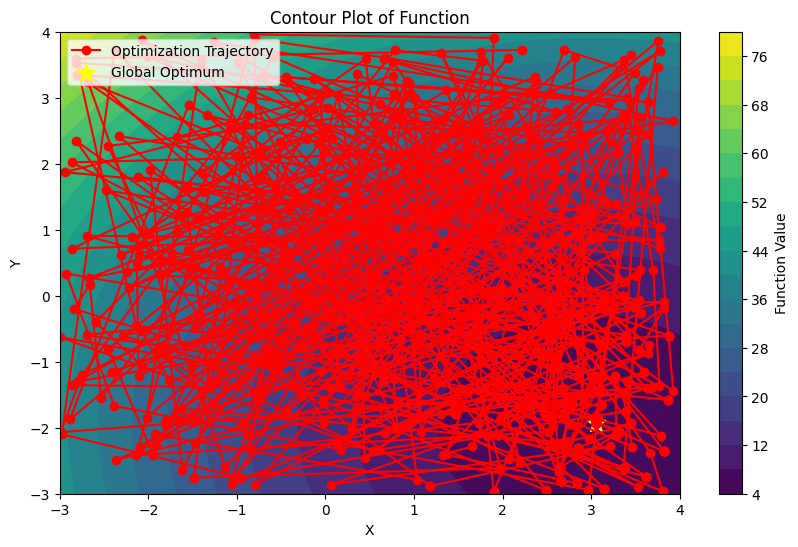

Optimal solution: (3.0573787927642018, -1.9235976440549012)
Function value at optimal solution: 5.009129645853039


In [18]:
# Simulate
best_solution, best_value, states, function_values,iterations,temperatures= simulate(1500)

# Plot contour plot of the function
x = np.linspace(-3, 4, 100)
y = np.linspace(-3, 4, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(label='Function Value')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of Function')

# Overlay the trajectory
x_traj = [s[0] for s in states]
y_traj = [s[1] for s in states]
plt.plot(x_traj, y_traj, marker='o', color='red', label='Optimization Trajectory')
plt.scatter(best_solution[0], best_solution[1], color='yellow', marker='*', s=200, label='Global Optimum')
plt.legend()

plt.show()

print("Optimal solution:", best_solution)
print("Function value at optimal solution:", best_value)

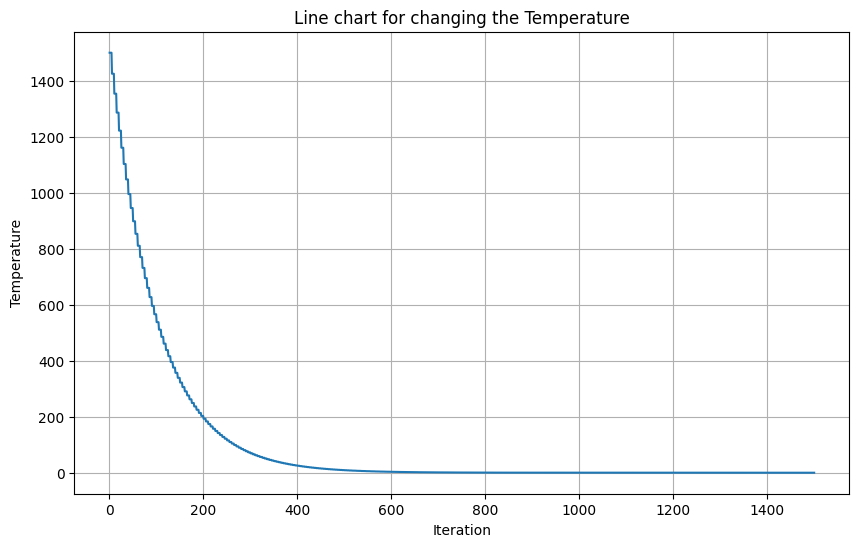

In [19]:
# Draw the plot for temperature vs iteration
plt.figure(figsize = (10,6))
plt.plot(iterations,temperatures)
plt.title("Line chart for changing the Temperature")
plt.xlabel("Iteration")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

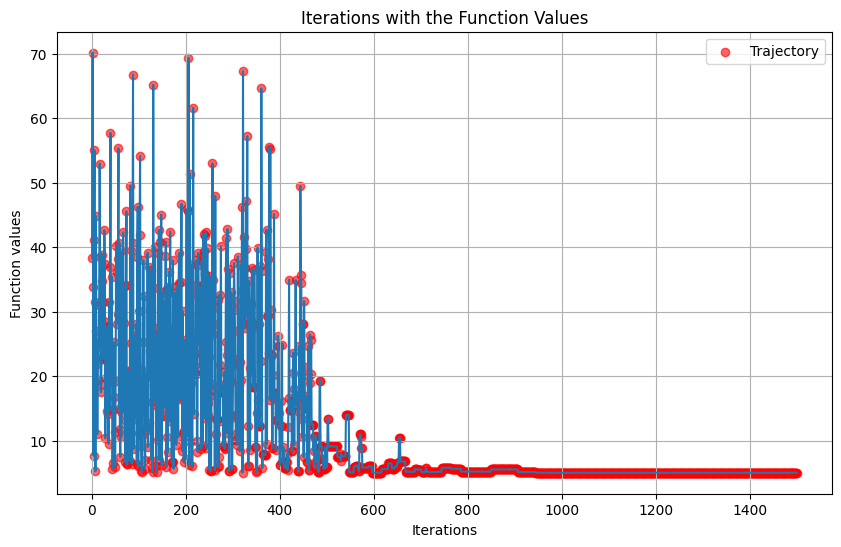

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(iterations,function_values)
plt.scatter(iterations,function_values, c='red', label='Trajectory', alpha=0.6)
plt.xlabel('Iterations')
plt.ylabel('Function values')
plt.title('Iterations with the Function Values')
plt.legend()
plt.grid(True)
plt.show()

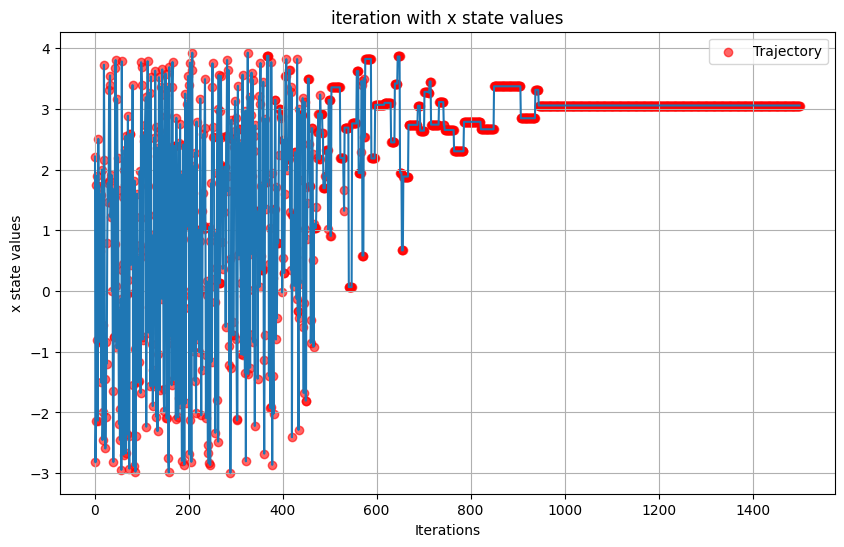

In [21]:
x = [s[0] for s in states]
y = [s[1] for s in states]
z = [f(s[0], s[1]) for s in states]
plt.figure(figsize=(10, 6))
plt.plot(iterations,x)
plt.scatter(iterations,x, c='red', label='Trajectory', alpha=0.6)
plt.xlabel('Iterations')
plt.ylabel('x state values')
plt.title('iteration with x state values')
plt.legend()
plt.grid(True)
plt.show()

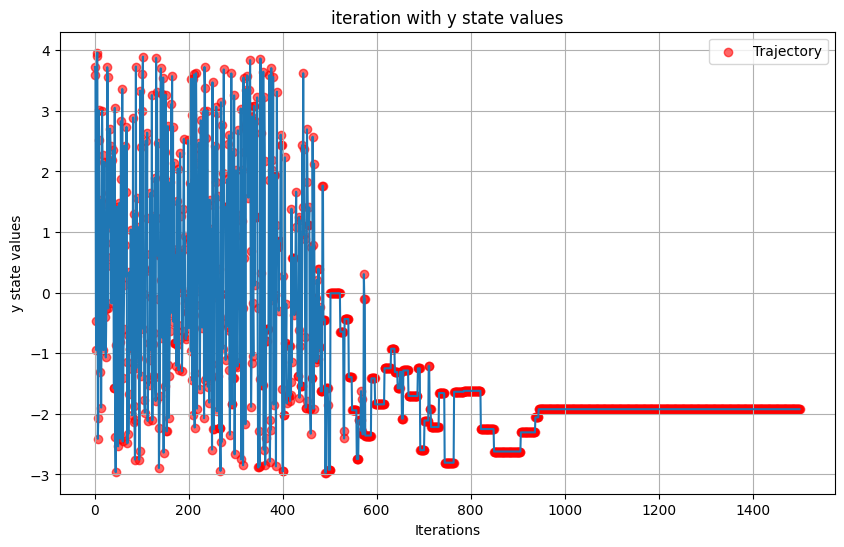

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(iterations,y)
plt.scatter(iterations,y, c='red', label='Trajectory', alpha=0.6)
plt.xlabel('Iterations')
plt.ylabel('y state values')
plt.title('iteration with y state values')
plt.legend()
plt.grid(True)
plt.show()

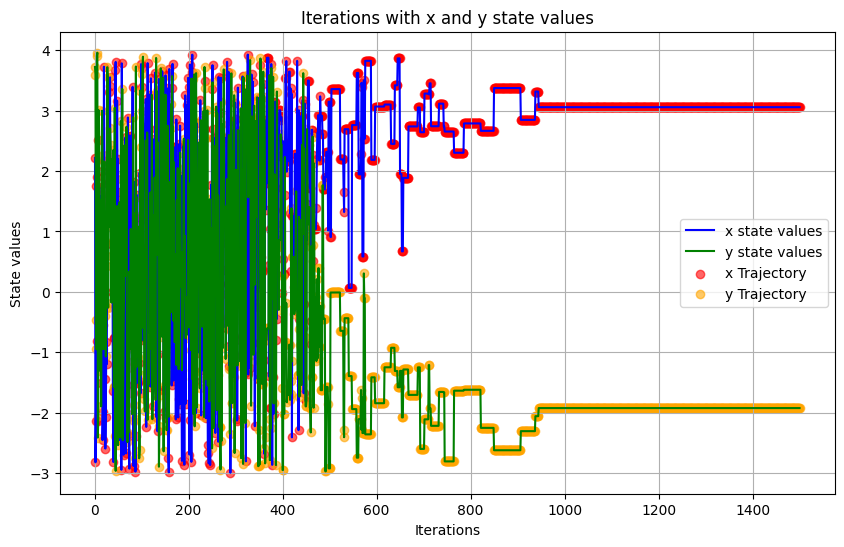

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(iterations, x, label='x state values', color='blue')
plt.plot(iterations, y, label='y state values', color='green')
plt.scatter(iterations, x, c='red', label='x Trajectory', alpha=0.6)
plt.scatter(iterations, y, c='orange', label='y Trajectory', alpha=0.6)
plt.xlabel('Iterations')
plt.ylabel('State values')
plt.title('Iterations with x and y state values')
plt.legend()
plt.grid(True)
plt.show()

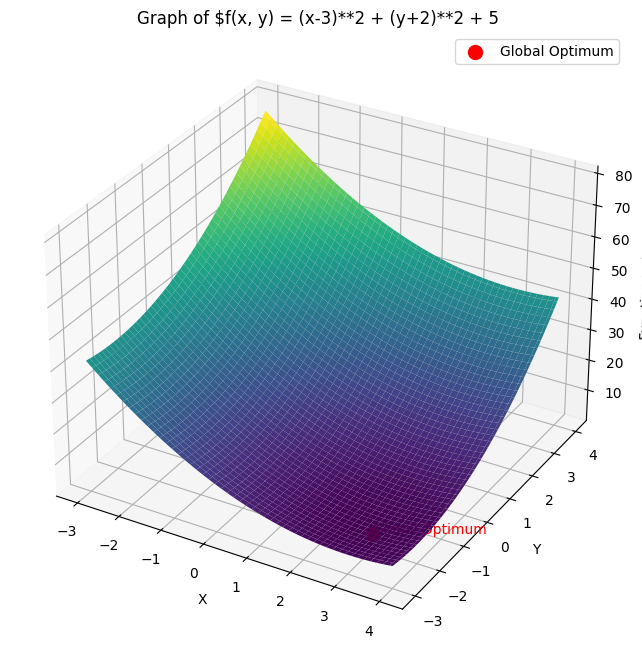

Global Optimum Point: (x=3.0101010101010095, y=-2.0101010101010104, z=5.0002040608101215)


In [7]:
# Define the two-variable function
def f(x, y):
    return (x-3)**2 + (y+2)**2 + 5  # Example function, you can replace it with any non-linear function

# Generate data points
x = np.linspace(-3, 4, 100)
y = np.linspace(-3,4, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Find global optimum point
global_optimum = np.unravel_index(np.argmin(Z), Z.shape)
global_x = X[global_optimum]
global_y = Y[global_optimum]
global_z = Z[global_optimum]

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Annotate global optimum point
ax.scatter(global_x, global_y, global_z, color='red', s=100, label='Global Optimum')
ax.text(global_x, global_y, global_z, 'Global Optimum', color='red')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Function Value')
ax.set_title('Graph of $f(x, y) = (x-3)**2 + (y+2)**2 + 5')

plt.legend()
plt.show()

print("Global Optimum Point: (x={}, y={}, z={})".format(global_x, global_y, global_z))

ValueError: x and y must have same first dimension, but have shapes (0,) and (100,)

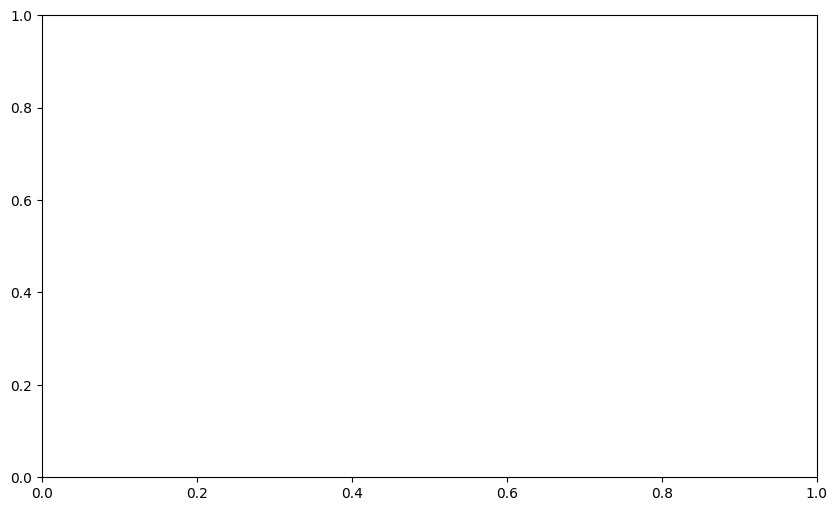

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(iterations, x, label='x state values', color='blue')
plt.plot(iterations, y, label='y state values', color='green')
plt.scatter(iterations, x, c='red', label='x Trajectory', alpha=0.6)
plt.scatter(iterations, y, c='orange', label='y Trajectory', alpha=0.6)
plt.xlabel('Iterations')
plt.ylabel('State values')
plt.title('Iterations with x and y state values')
plt.legend()
plt.grid(True)
plt.show()